# Import

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Global Variables

In [2]:
root = "./data"
trials = 0
loadValues = set()
throughputs = []
responseTimes = []
powers = []

for file in os.listdir(root):
   load, trial = file.split("CTT_")[1].split(".csv")[0].split("_")
   trials = max(trials, int(trial))
   loadValues.add(int(load))

loadValues = list(loadValues)
loadValues.sort()


In [3]:
loadValues

[500, 1000, 2000, 4000, 8000]

# 

# Compute throughputs and reponsesTimes

In [4]:
def computeMetrics(dataset):
    duration = (dataset["timeStamp"].max() - dataset["timeStamp"].min()) / 1000
    correctlyServed = len(dataset[dataset["responseCode"].apply(lambda x: str(x)) == "200"])
    throughput = correctlyServed / duration
    responseTime = dataset["elapsed"].mean()
    return throughput, responseTime

In [5]:
for loadValue in loadValues:
    throughput = 0
    responseTime = 0  
    for trial in range(trials):
        file = "CTT_" + str(loadValue) + "_" + str(trial+1) + ".csv"
        dataset = pd.read_csv(os.path.join(root, file))
        trialThroughput, trialResponseTime = computeMetrics(dataset)
        throughput += trialThroughput 
        responseTime += trialResponseTime  
        print(file, "  with ", trialThroughput, " throughput,  ", trialResponseTime, " responseTime")
    throughputs.append(throughput/trials)
    responseTimes.append(responseTime/trials)
    powers.append(throughput/responseTime)
    

CTT_500_1.csv   with  8.499943333711109  throughput,   43.03568627450981  responseTime
CTT_500_2.csv   with  8.497601402820978  throughput,   40.820321694782265  responseTime
CTT_500_3.csv   with  8.49771471814857  throughput,   38.233817183209105  responseTime
CTT_1000_1.csv   with  16.83327722240926  throughput,   41.18554455445545  responseTime
CTT_1000_2.csv   with  16.830841542077103  throughput,   41.61457714398891  responseTime
CTT_1000_3.csv   with  16.829943900187  throughput,   41.67617349970291  responseTime
CTT_2000_1.csv   with  28.74205175569923  throughput,   359.661252900232  responseTime
CTT_2000_2.csv   with  29.759245801302782  throughput,   321.906799596729  responseTime
CTT_2000_3.csv   with  33.48655504481652  throughput,   65.74278319729245  responseTime
CTT_4000_1.csv   with  37.73572326247329  throughput,   896.0872791519434  responseTime
CTT_4000_2.csv   with  48.257676524220514  throughput,   606.6487289306439  responseTime
CTT_4000_3.csv   with  25.839379534

In [6]:
throughputs

[8.498419818226886,
 16.83135422155779,
 30.66261753393951,
 37.27759310711493,
 29.03151761177142]

In [7]:
responseTimes

[40.696608384167064,
 41.49209839938242,
 249.1036118980845,
 1023.1963645153509,
 1642.4934896225639]

In [8]:
powers

[0.20882378546152214,
 0.40565203667328403,
 0.12309182231562535,
 0.036432491748318425,
 0.017675271040765408]

# Plots

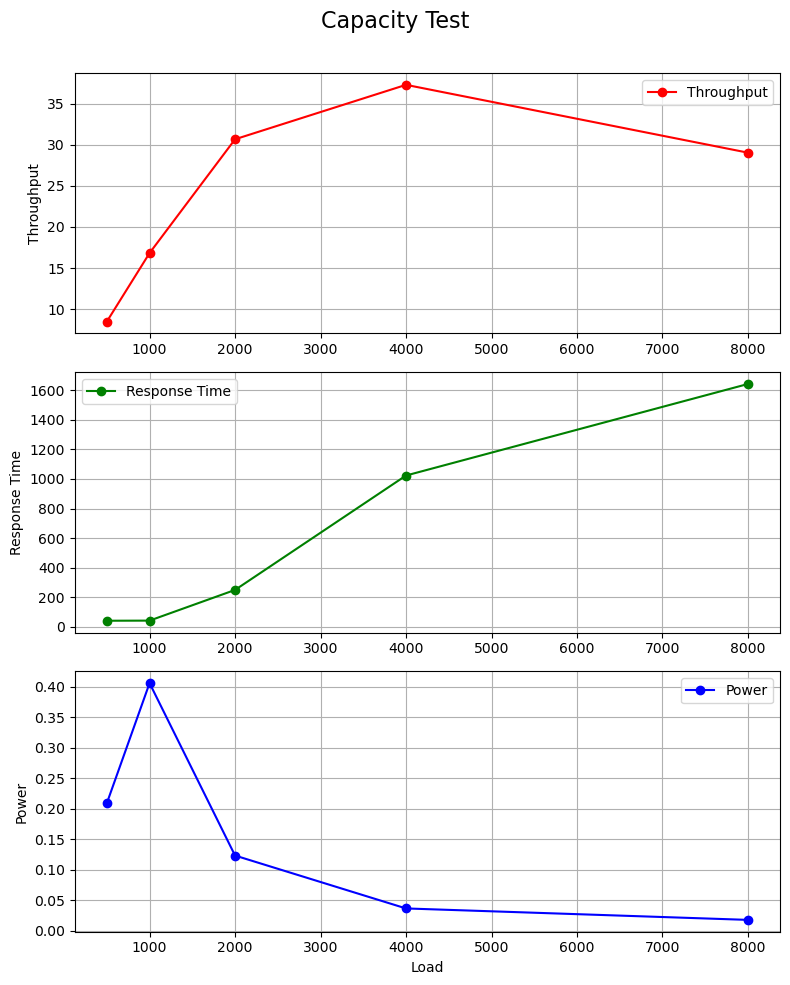

In [9]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].plot(loadValues, throughputs, '-o', label='Throughput', color="red")
axs[0].legend()
axs[0].set_ylabel('Throughput')
axs[0].grid(True)

axs[1].plot(loadValues, responseTimes, '-o', label='Response Time', color="green")
axs[1].legend()
axs[1].set_ylabel('Response Time')
axs[1].grid(True)

axs[2].plot(loadValues, powers, '-o', label='Power', color="blue")
axs[2].legend()
axs[2].set_ylabel('Power')
axs[2].set_xlabel('Load')
axs[2].grid(True)

plt.suptitle('Capacity Test', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()